In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import itertools
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'StreamingTV'], axis = 1, inplace = True)

In [4]:
df.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df.loc[df ['TotalCharges'].isnull() == True]

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,Yes,Yes,0,DSL,Yes,No,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,0,No,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,0,Yes,Yes,0,DSL,Yes,Yes,Yes,No,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,0,Yes,Yes,0,DSL,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,0,Yes,Yes,0,DSL,No,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
df.dropna(how = 'any', inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df['Churn'] = np.where(df.Churn == 'Yes', 1, 0)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [9]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [10]:
x = df_dummies.drop('Churn',axis=1)
x.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [11]:
y = df['Churn']
y[0:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [12]:
over_sampled = RandomOverSampler(random_state = 0)

In [13]:
x, y = over_sampled.fit_sample(x, y)
x, y

(       SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Partner_Yes  \
 0                  0       1           29.85         29.85            1   
 1                  0      34           56.95       1889.50            0   
 2                  0       2           53.85        108.15            0   
 3                  0      45           42.30       1840.75            0   
 4                  0       2           70.70        151.65            0   
 ...              ...     ...             ...           ...          ...   
 10321              0      48           45.30       2145.00            1   
 10322              1      27           85.25       2287.25            0   
 10323              0      12           84.50        916.90            1   
 10324              0      28           94.50       2659.40            0   
 10325              1       1           93.55         93.55            0   
 
        Dependents_Yes  InternetService_Fiber optic  InternetService_No  \
 0         

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [15]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
prediction = model.predict(x_test)

In [17]:
model_score = model.score(x_test,y_test)
model_score

0.8949661181026137

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title ='Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, prediction, labels = [1, 0]))

[[1020   45]
 [ 172  829]]


Confusion matrix, without normalization
[[1020   45]
 [ 172  829]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1001
           1       0.86      0.96      0.90      1065

    accuracy                           0.89      2066
   macro avg       0.90      0.89      0.89      2066
weighted avg       0.90      0.89      0.89      2066



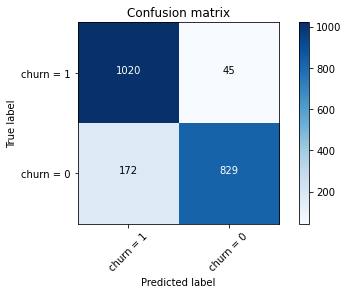

In [19]:
cnf_matrix = confusion_matrix(y_test, prediction, labels = [1, 0])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['churn = 1','churn = 0'], normalize = False,  title ='Confusion matrix')
print(classification_report(y_test, prediction))

In [20]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [21]:
model.predict([[0,2,1153.85,1908.15,0,1,1,1,1,1,0,1,0,0,0,1,0,0,1,1,1,1,1,1]])

array([0])